### 1st u have to install Xgboost

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report ,precision_score ,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [2]:
# load the dataset 
df = sns.load_dataset('diamonds')
df.head()


# plot the data as scatterplot
# sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species')


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# split the data X and y 
X = df.drop('cut', axis = 1)
y = df['cut']

# encode the input variables
encoder = LabelEncoder()
X['color'] = encoder.fit_transform(X['color'])
X['clarity'] = encoder.fit_transform(X['clarity'])

# encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [4]:
%%time 
# train the decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

# print the accuracy SCORE
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score:",recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score:",f1_score(y_test, y_pred, average = 'macro'))

# plotting confusion matrix
# sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
# plt.title("Confusion Matrix")
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.show()


Accuracy Score: 0.7184835001853912
Precision Score: 0.7236952329933178
Recall Score: 0.728946264498999
F1 Score: 0.7262615380395807
CPU times: total: 375 ms
Wall time: 1.01 s


In [5]:
%%time
# train the model forest model 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# make predictions on the test set
y_pred = rf.predict(X_test)

# print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score:",recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score:",f1_score(y_test, y_pred, average = 'macro'))

Accuracy Score: 0.78596588802373
Precision Score: 0.793792305378999
Recall Score: 0.7753625492095773
F1 Score: 0.7818707661866073
CPU times: total: 15 s
Wall time: 40.3 s


In [6]:
%%time

xgb = XGBRFClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score:",recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score:",f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.7418427882832778
Precision Score: 0.7718945561962827
Recall Score: 0.7201797984812321
F1 Score: 0.7217663654427693
CPU times: total: 12.7 s
Wall time: 20.9 s


In [7]:
# make a bar plot showing each of the matrix with respected to the model

# create a dataframe
df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred, average = 'macro'), precision_score(y_test, y_pred, average = 'macro'), precision_score(y_test, y_pred, average = 'macro')],
    'Recall': [recall_score(y_test, y_pred, average = 'macro'), recall_score(y_test, y_pred, average = 'macro'), recall_score(y_test, y_pred, average = 'macro')],
    'F1 Score': [f1_score(y_test, y_pred, average = 'macro'), f1_score(y_test, y_pred, average = 'macro'), f1_score(y_test, y_pred, average = 'macro')]
})
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.741843,0.771895,0.72018,0.721766
1,Random Forest,0.741843,0.771895,0.72018,0.721766
2,XGBoost,0.741843,0.771895,0.72018,0.721766


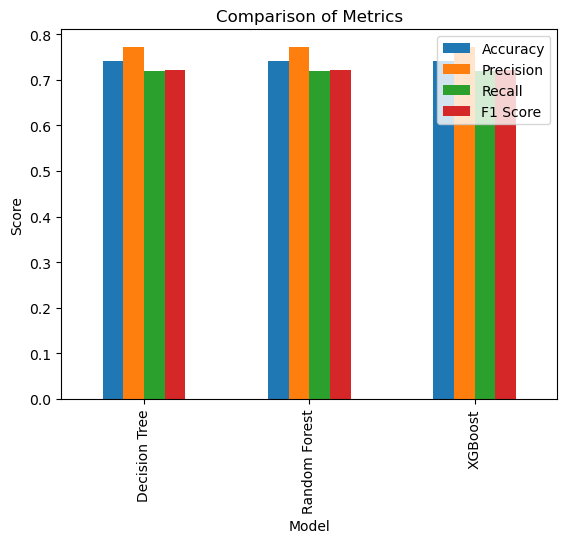

In [8]:
# make a bar plot showing each of the matrix with respected to the model
df.plot(x = 'Model', y = ['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind = 'bar')
plt.title("Comparison of Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()

# make a bar plot showing each of the matrix with respected to the model




